# 图31 华夫饼图

华夫饼图可以显示更大人群中的群体组成。

绘制华夫饼图可以导入`pywaffle`包，需要执行`pip install pywaffle`。

原代码运行报错`ValueError: Single argument to subplot must be a three-digit integer, not '111'`，将`'111'`改为`111`即可.

C:\Users\15399\AppData\Roaming\Python\Python39\site-packages\pywaffle\waffle.py:283: PendingDeprecationWarning: The set_tight_layout function will be deprecated in a future version. Use set_layout_engine instead.
  self.set_tight_layout(self.fig_args["tight"])


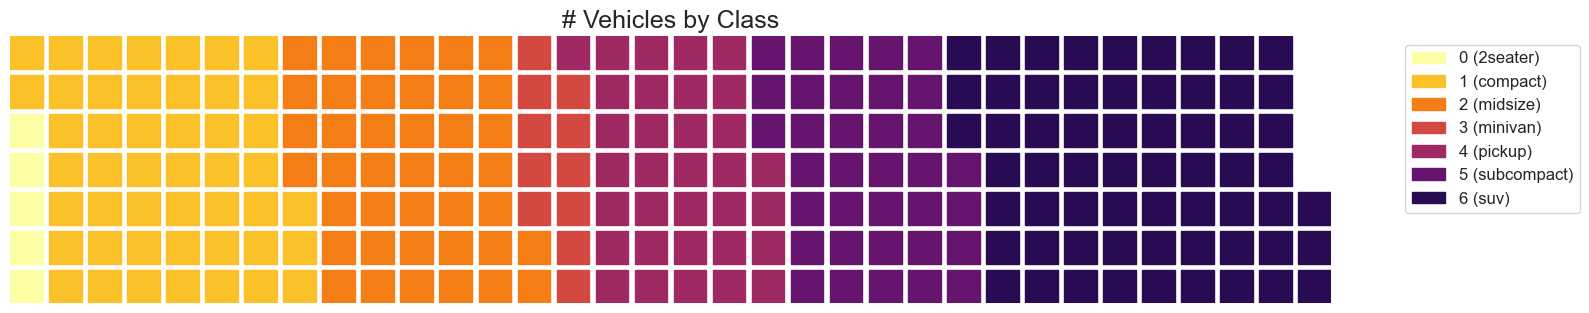

In [8]:
# Reference: https://stackoverflow.com/questions/41400136/how-to-do-waffle-charts-in-python-square-piechart
from doc.Plot.require import *
from pywaffle import Waffle

# Import
df_raw = pd.read_csv("https://github.com/selva86/datasets/raw/master/mpg_ggplot2.csv")
# df_raw = pd.read_csv("../data/mpg_ggplot2.csv")

# Prepare Data
df = df_raw.groupby('class').size().reset_index(name='counts')
n_categories = df.shape[0]
colors = [plt.cm.inferno_r(i / float(n_categories)) for i in range(n_categories)]

# Draw Plot and Decorate
fig = plt.figure(
    FigureClass=Waffle,
    plots={
        111: {
            'values': df['counts'],
            'labels': ["{0} ({1})".format(n[0], n[1]) for n in df[['class', 'counts']].itertuples()],
            'legend': {'loc': 'upper left', 'bbox_to_anchor': (1.05, 1), 'fontsize': 12},
            'title': {'label': '# Vehicles by Class', 'loc': 'center', 'fontsize': 18}
        },
    },
    rows=7,
    colors=colors,
    figsize=(16, 9)
)

C:\Users\15399\AppData\Roaming\Python\Python39\site-packages\pywaffle\waffle.py:283: PendingDeprecationWarning: The set_tight_layout function will be deprecated in a future version. Use set_layout_engine instead.
  self.set_tight_layout(self.fig_args["tight"])


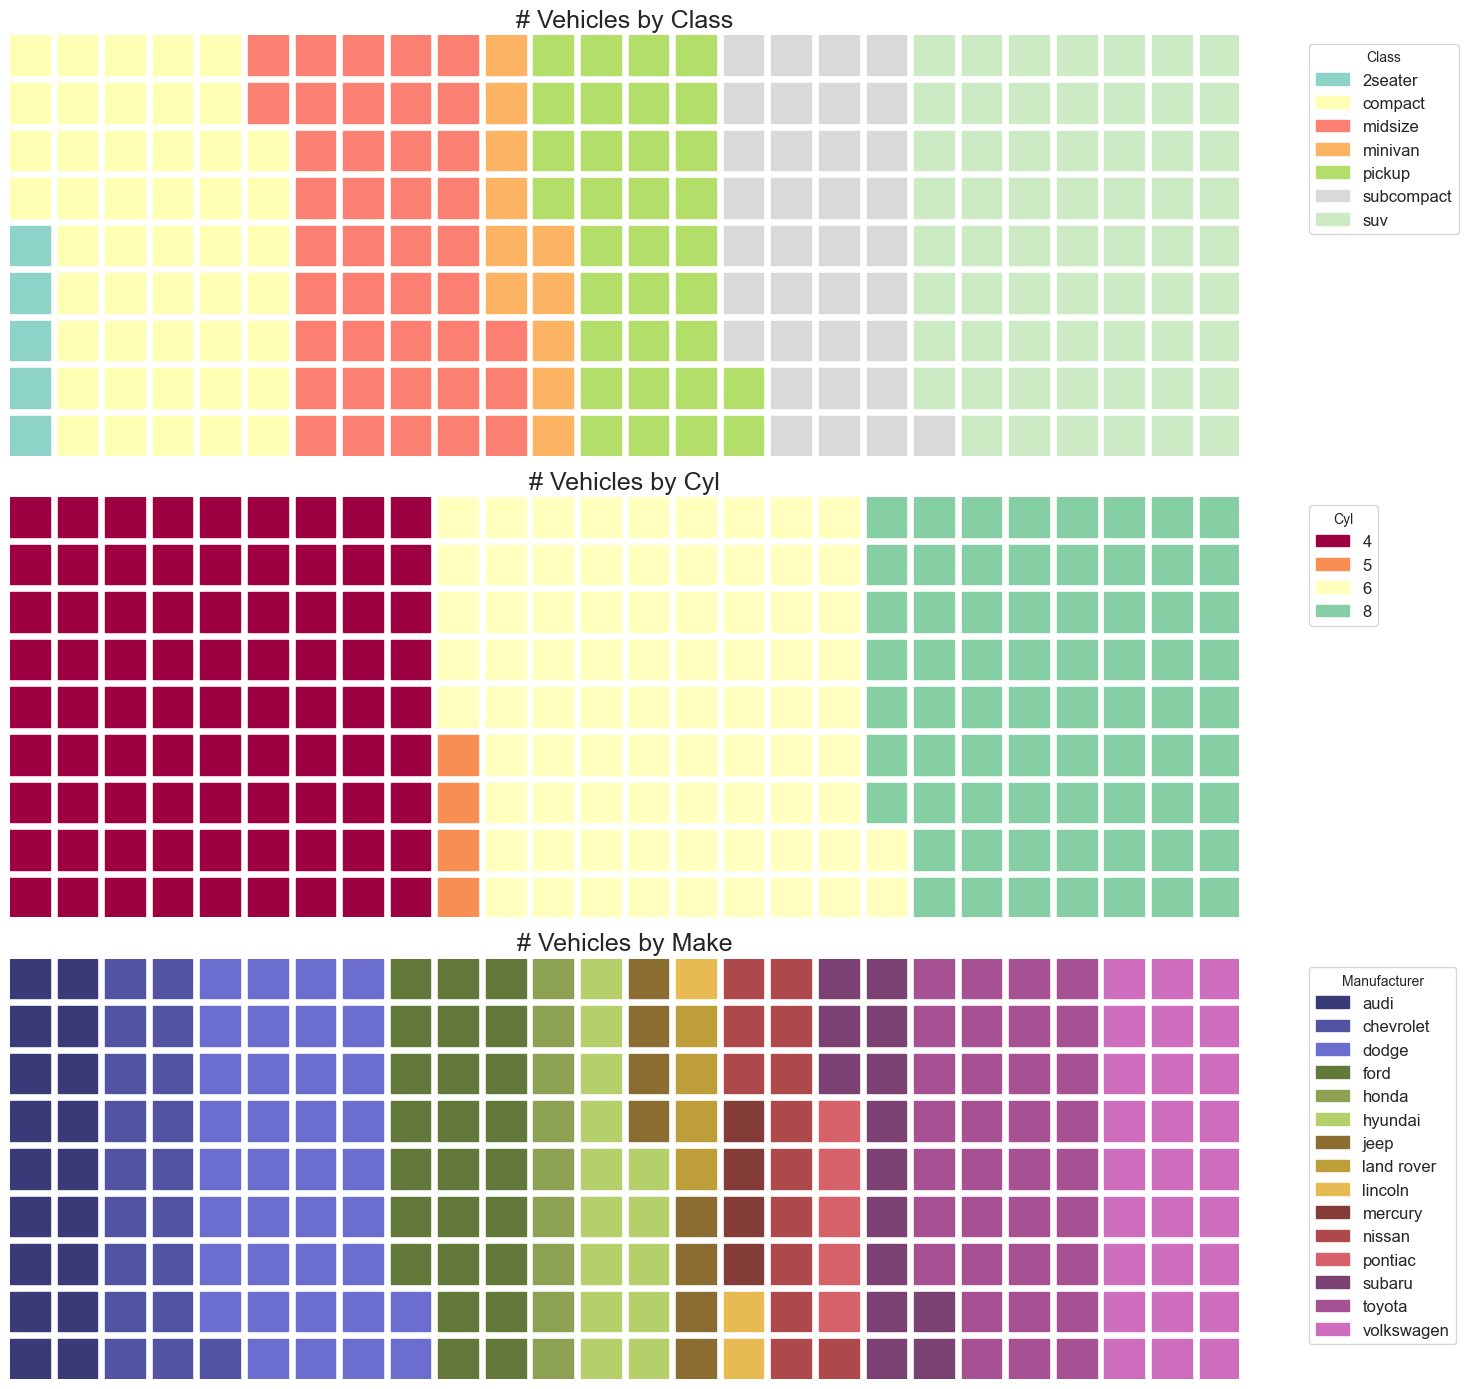

In [9]:
from pywaffle import Waffle
from doc.Plot.require import *

# Import
df_raw = pd.read_csv("https://github.com/selva86/datasets/raw/master/mpg_ggplot2.csv")
# df_raw = pd.read_csv("../data/mpg_ggplot2.csv")

# Prepare Data
# By Class Data
df_class = df_raw.groupby('class').size().reset_index(name='counts_class')
n_categories = df_class.shape[0]
colors_class = [plt.cm.Set3(i / float(n_categories)) for i in range(n_categories)]

# By Cylinders Data
df_cyl = df_raw.groupby('cyl').size().reset_index(name='counts_cyl')
n_categories = df_cyl.shape[0]
colors_cyl = [plt.cm.Spectral(i / float(n_categories)) for i in range(n_categories)]

# By Make Data
df_make = df_raw.groupby('manufacturer').size().reset_index(name='counts_make')
n_categories = df_make.shape[0]
colors_make = [plt.cm.tab20b(i / float(n_categories)) for i in range(n_categories)]

# Draw Plot and Decorate
fig = plt.figure(
    FigureClass=Waffle,
    plots={
        311: {
            'values': df_class['counts_class'],
            'labels': ["{1}".format(n[0], n[1]) for n in df_class[['class', 'counts_class']].itertuples()],
            'legend': {'loc': 'upper left', 'bbox_to_anchor': (1.05, 1), 'fontsize': 12, 'title': 'Class'},
            'title': {'label': '# Vehicles by Class', 'loc': 'center', 'fontsize': 18},
            'colors': colors_class
        },
        312: {
            'values': df_cyl['counts_cyl'],
            'labels': ["{1}".format(n[0], n[1]) for n in df_cyl[['cyl', 'counts_cyl']].itertuples()],
            'legend': {'loc': 'upper left', 'bbox_to_anchor': (1.05, 1), 'fontsize': 12, 'title': 'Cyl'},
            'title': {'label': '# Vehicles by Cyl', 'loc': 'center', 'fontsize': 18},
            'colors': colors_cyl
        },
        313: {
            'values': df_make['counts_make'],
            'labels': ["{1}".format(n[0], n[1]) for n in df_make[['manufacturer', 'counts_make']].itertuples()],
            'legend': {'loc': 'upper left', 'bbox_to_anchor': (1.05, 1), 'fontsize': 12, 'title': 'Manufacturer'},
            'title': {'label': '# Vehicles by Make', 'loc': 'center', 'fontsize': 18},
            'colors': colors_make
        }
    },
    rows=9,
    figsize=(16, 14)
)